# K-Means tempalte

## ====== 3D ======

### =============== import the data set ==========

In [1]:
import pandas as pd
dataset = pd.read_csv('Mall_Customers.csv', header = 0)
x = dataset.iloc[:, 2:].values

### ====== Feature Scaling ======

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x) 

/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### ====== Use Elbow method to find the optimal number of clusters ======

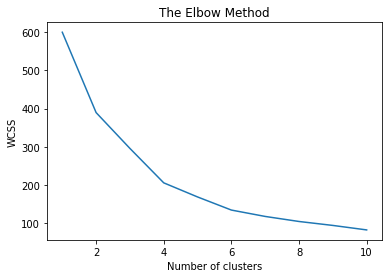

wcss: [600.0, 389.3861889564372, 295.4562449213557, 205.22514747675916, 168.24758017556837, 133.88887021131026, 117.16911517019712, 103.94423632967379, 93.61455312876808, 81.84894954697742]


In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
import matplotlib.pyplot as plt               
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print ('wcss:', wcss) #find the elbow, which is at 5

### ===== Fitting K-Means to the dataset ======

In [4]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x)   

### ===== Visualising the clusters ========

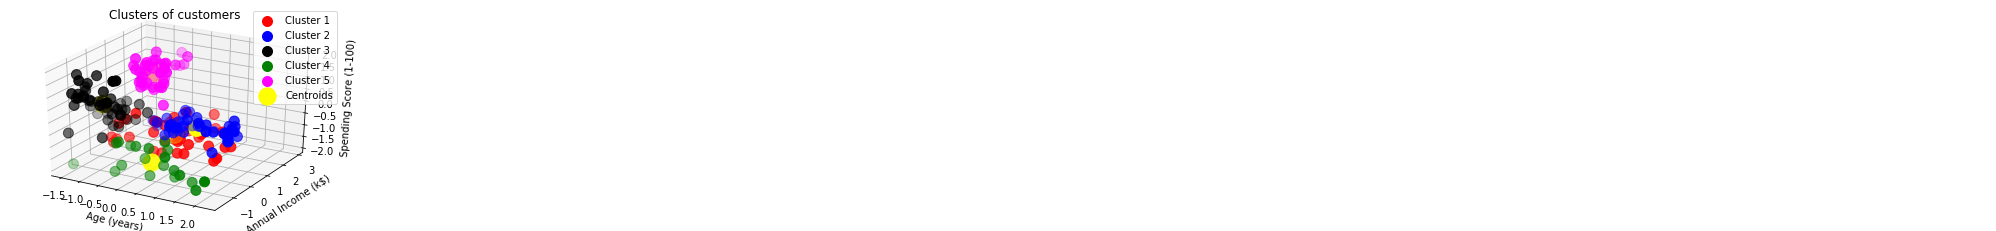

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')                
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s = 100, c = 'black', label = 'Cluster 3')
ax.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], x[y_kmeans == 3, 2], s = 100, c = 'green', label = 'Cluster 4')
ax.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], x[y_kmeans == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')                
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
ax.set_title('Clusters of customers')
ax.set_xlabel('Age (years)')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()  